In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("mydata.csv")

In [3]:
data.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Location,Speed_limit,Light_Conditions,Weather_Conditions,Urban_or_Rural_Area
0,52,2,1,1,6,612,40,6,1,2
1,1,3,2,1,6,22,30,7,1,1
2,21,3,1,1,6,257,30,4,1,1
3,35,2,2,1,6,395,70,4,1,2
4,97,3,1,1,6,913,60,6,8,2


In [4]:
for col in data.columns:
    var = data[col].isnull()
    print(var.value_counts())

False    4571
Name: Police_Force, dtype: int64
False    4571
Name: Accident_Severity, dtype: int64
False    4571
Name: Number_of_Vehicles, dtype: int64
False    4571
Name: Number_of_Casualties, dtype: int64
False    4571
Name: Day_of_Week, dtype: int64
False    4571
Name: Location, dtype: int64
False    4571
Name: Speed_limit, dtype: int64
False    4571
Name: Light_Conditions, dtype: int64
False    4571
Name: Weather_Conditions, dtype: int64
False    4571
Name: Urban_or_Rural_Area, dtype: int64


In [5]:
data.shape

(4571, 10)

In [6]:
data.columns

Index(['Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Location', 'Speed_limit',
       'Light_Conditions', 'Weather_Conditions', 'Urban_or_Rural_Area'],
      dtype='object')

In [7]:
import seaborn as sns

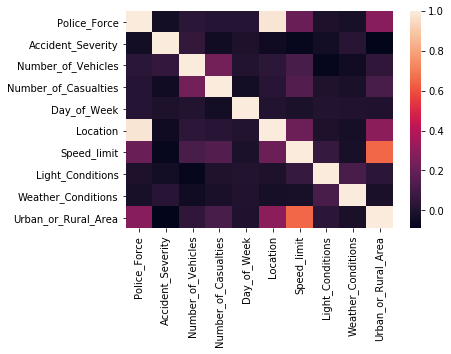

In [8]:
correlation = data.corr()
sns.heatmap(correlation)

In [9]:
data.dtypes

Police_Force            int64
Accident_Severity       int64
Number_of_Vehicles      int64
Number_of_Casualties    int64
Day_of_Week             int64
Location                int64
Speed_limit             int64
Light_Conditions        int64
Weather_Conditions      int64
Urban_or_Rural_Area     int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001766DA0DCF8>]],
      dtype=object)

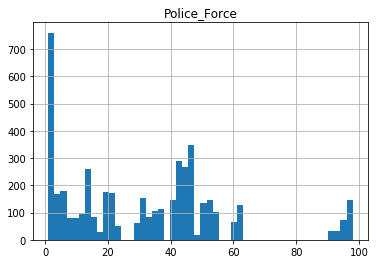

In [10]:
data.hist(column='Police_Force', bins=50)

In [11]:
from sklearn import preprocessing
data.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Location,Speed_limit,Light_Conditions,Weather_Conditions,Urban_or_Rural_Area
0,52,2,1,1,6,612,40,6,1,2
1,1,3,2,1,6,22,30,7,1,1
2,21,3,1,1,6,257,30,4,1,1
3,35,2,2,1,6,395,70,4,1,2
4,97,3,1,1,6,913,60,6,8,2


In [12]:
target = data.Accident_Severity
data = data.drop('Accident_Severity', axis=1)
print(data.shape, "\n", target.shape)

(4571, 9) 
 (4571,)


In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data, target, test_size=0.3, random_state=37)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3199, 9) (3199,)
Test set: (1372, 9) (1372,)


In [15]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

In [16]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8483901219130978
Test set Accuracy:  0.7470845481049563


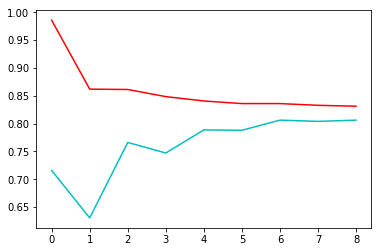

In [17]:
from sklearn.neighbors import KNeighborsClassifier
Test_accuracy = []
Train_accuracy = []
for i in range(1, 10):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_hat = neigh.predict(X_test)
    from sklearn import metrics
    Test_accuracy.append(metrics.accuracy_score(y_train, neigh.predict(X_train)))
    Train_accuracy.append(metrics.accuracy_score(y_test, y_hat))
    #print("For ", i, " neighbor Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)), " | Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))
plt.plot(Test_accuracy, color="r")
plt.plot(Train_accuracy, color="c")

In [18]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree.fit(X_train,y_train)
predTree = drugTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.8075801749271136
